# Notebook para executar o script e analisar os dados iniciais
---

In [1]:
import sys
sys.path.append('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes/') 

%load_ext autoreload  
%autoreload 2         


from depth_from_focus import *  
from image_alignment import *
from utils import *
from mediana_ponderada import *
from weighted_filter import *


In [2]:
# Parâmetros
parametros= {'path': '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/',
             'interpolation_type': 'crop',
             'focal_step': 3,
             'focal_descriptor': 'fourier',
             'laplacian_kernel_size': 1,
             'gaussian_size': 9,
             'focus_measure_kernel_size': 0,
             'gabaritos': False,
             'debug': True,
             }


#BASE_PATH = parametros['path']
#main_align(BASE_PATH)

depth_map, all_in_focus_img, img_conf = main_depth(parametros)

/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/output/align_images/aligned//align_0.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/output/align_images/aligned//align_1.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/output/align_images/aligned//align_2.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/output/align_images/aligned//align_3.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/output/align_images/aligned//align_4.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/output/align_images/aligned//align_5.jpg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/internet_focus_stack/imagens_3/output/align_images/aligned//align_6.jpg

/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes/weighted_filter.py:62: RuntimeWarning: invalid value encountered in scalar divide
  r = (conf_total/2 - s0)/(s1 - s0)
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes/weighted_filter.py:13: RuntimeWarning: invalid value encountered in cast
  img_filtered[i, j] = mediana_arg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes/weighted_filter.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  r = (conf_total/2 - s0)/(s1 - s0)


... Saving images ...
Saving focus indicator images
Saving selected images
Saving depth-from-focus image
Saving all-in-focus image
Saving focus measure image
Saving confidence image
confidence image: min=0.0, max=1.0


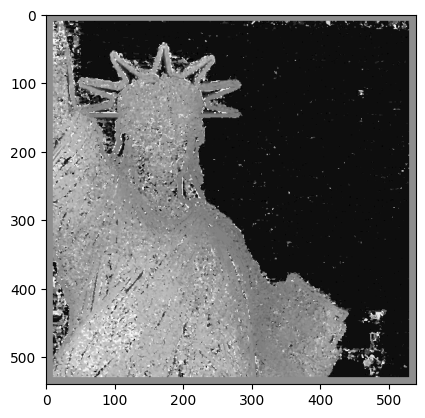

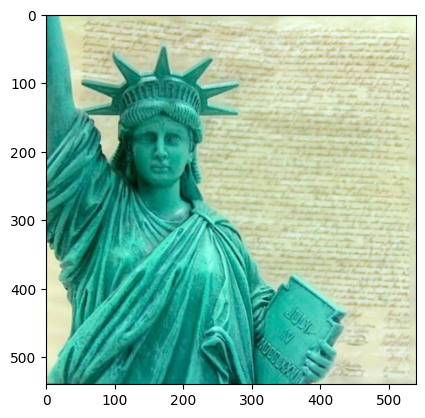

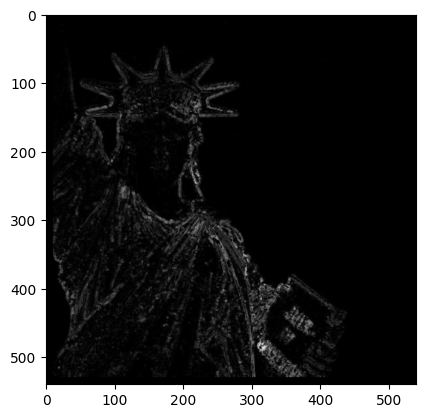

In [3]:
exibir_imagem(depth_map)
exibir_imagem(all_in_focus_img)
exibir_imagem(img_conf)

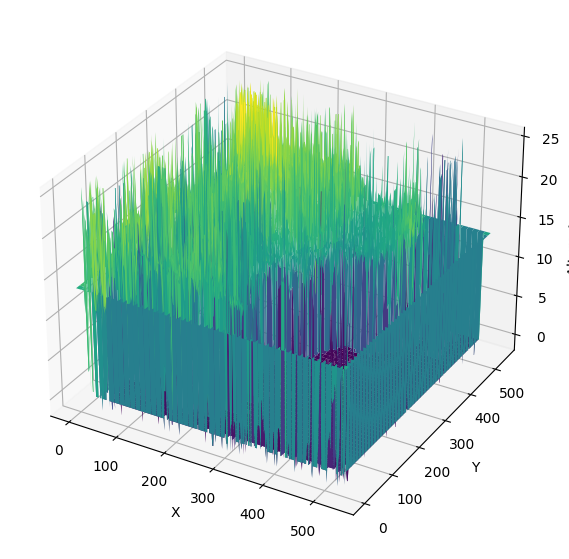

In [4]:
plot_3d(depth_map)

In [ ]:
img_filtrada = filter_img_arg_mediana_2(depth_map, img_conf)
exibir_imagem(depth_map)
exibir_imagem(img_filtrada)

/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes/weighted_filter.py:62: RuntimeWarning: invalid value encountered in scalar divide
  r = (conf_total/2 - s0)/(s1 - s0)
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes/weighted_filter.py:13: RuntimeWarning: invalid value encountered in cast
  img_filtered[i, j] = mediana_arg
/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/Codes/weighted_filter.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  r = (conf_total/2 - s0)/(s1 - s0)


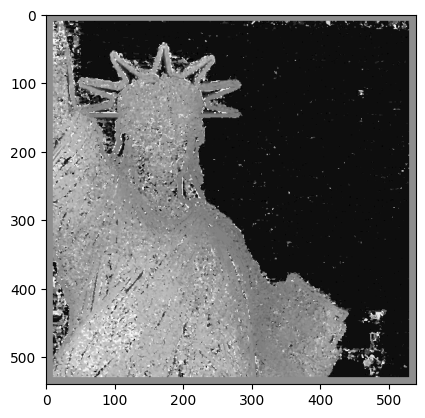

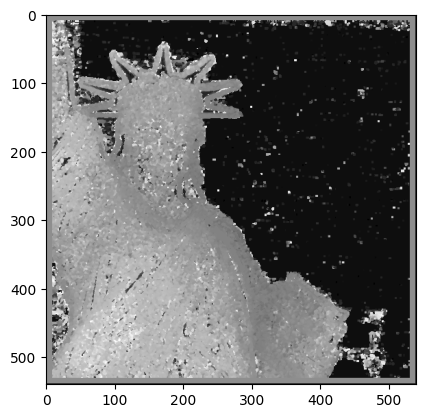

In [12]:
img_filtrada = filter_img_arg_mediana_1(depth_map, img_conf)
exibir_imagem(depth_map)
exibir_imagem(img_filtrada)

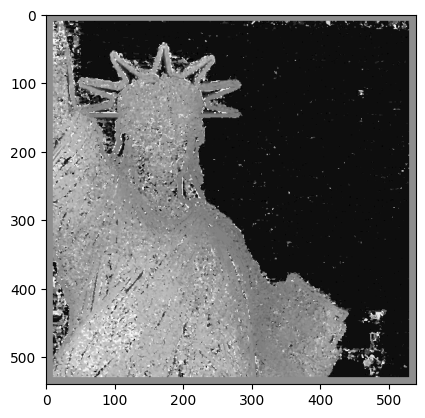

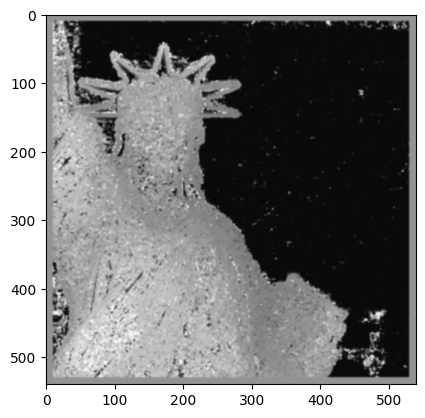

In [19]:
import cv2

# Aplicar filtro de blur na imagem depth_map
blurred_depth_map = cv2.GaussianBlur(depth_map, (5, 5), 0)

# Exibir a imagem original e a imagem com blur
exibir_imagem(depth_map)
exibir_imagem(blurred_depth_map)

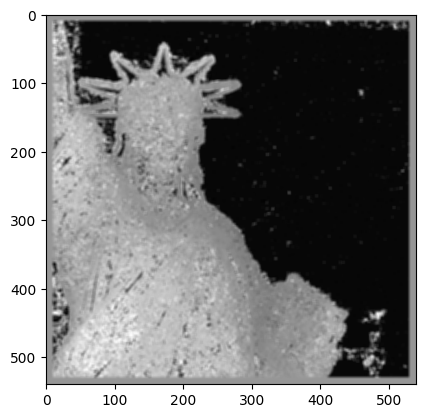

In [20]:
import cv2

# Aplicar filtro de média na imagem depth_map
media_depth_map = cv2.blur(depth_map, (5, 5))

# Exibir a imagem original e a imagem com filtro de média
#exibir_imagem(depth_map)
exibir_imagem(media_depth_map)

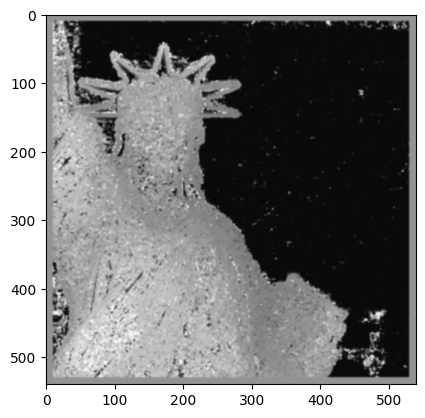

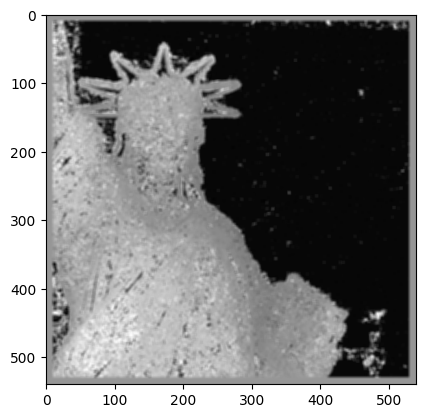

In [22]:
exibir_imagem(blurred_depth_map)
exibir_imagem(media_depth_map)

In [ ]:
create_stl_from_heightmap(img_filtrada, scale=(1,1,4), output_file='img_filtrada.stl')

In [ ]:
create_stl_from_heightmap(depth_map, scale=(1, 1, 4), output_file="output.stl")

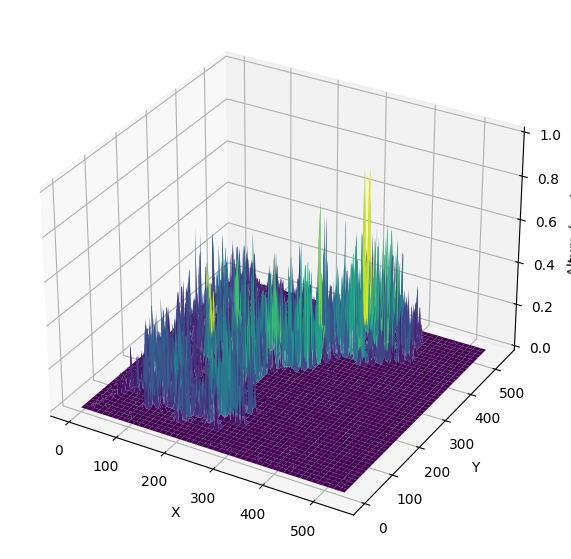

In [7]:
plot_3d(img_conf)

In [ ]:
depth_map.min(), depth_map.max()

In [8]:
img_conf.min(), img_conf.max(), img_conf.mean(), img_conf.std()

(0.0, 1.0, 0.027968808916893736, 0.06281092874469212)

In [ ]:
exibir_imagem(img_conf)

In [ ]:
import numpy as np
from scipy.ndimage import convolve

def weighted_filter(height_map, confidence_map, kernel):
    # Normalizar o kernel para que a soma dos pesos seja 1
    kernel = kernel / np.sum(kernel)
    
    # Aplicar convolução no mapa de altura e no mapa de confiabilidade
    filtered_height_map = convolve(normalize(height_map) * normalize(confidence_map), kernel)
    normalization_factor = convolve(confidence_map, kernel)
    
    # Evitar divisão por zero
    normalization_factor[normalization_factor == 0] = 0.001
    
    # Calcular o mapa de altura filtrado
    filtered_height_map = filtered_height_map.astype(np.float64) / normalization_factor.astype(np.float64)
    
    return filtered_height_map



In [ ]:
import numpy as np
from scipy.ndimage import convolve

def weighted_filter(height_map, confidence_map, kernel):
    # Normalizar o kernel para que a soma dos pesos seja 1
    kernel = kernel / np.sum(kernel)
    k=1# Fator de ponderação
    # Aplicar convolução no mapa de altura e no mapa de confiabilidade
    filtered_height_map = convolve(normalize(height_map) * (k*normalize(confidence_map)+(1-k)), kernel)
    normalization_factor = convolve((k*normalize(confidence_map)+(1-k)), kernel)
    
    # Evitar divisão por zero
    normalization_factor[normalization_factor == 0] = 0.00000000001
    
    # Calcular o mapa de altura filtrado
    filtered_height_map /= normalization_factor
    
    return filtered_height_map



In [ ]:
img_conf

In [ ]:


# Exemplo de kernel WEIGHTS
print("Kernel WEIGHTS:")
print(WEIGHTS)

# Exemplo de kernel 3x3
kernel_3x3 = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]])

print("Kernel 3x3:")
print(kernel_3x3)




In [ ]:
# Exemplo de uso
filtered_depth_map = weighted_filter(depth_map, img_conf, WEIGHTS)
exibir_imagem(filtered_depth_map)

In [ ]:
# Exemplo de uso
filtered_depth_map = weighted_filter(depth_map, img_conf, kernel_3x3)
exibir_imagem(depth_map)
exibir_imagem(filtered_depth_map)

In [ ]:
plot_3d(depth_map, z_scale=4)
# plot_3d(depth_map_cropped, z_scale=4)

In [ ]:
plot_3d(filtered_depth_map, z_scale=4)

In [ ]:
depth_map_2 = read_images_from_path('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_3/output/depth_from_focus_20241022_1747/depth_map/')
exibir_imagem(depth_map_2[0])

In [ ]:
focus_image

In [ ]:
def ler_arquivo_txt(caminho_arquivo):
    """
    Lê o conteúdo de um arquivo .txt e retorna como uma string.

    Parâmetros:
    caminho_arquivo (str): O caminho completo para o arquivo .txt.

    Retorna:
    str: O conteúdo do arquivo .txt.
    """
    with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
        conteudo = arquivo.read()
    return conteudo

# Exemplo de uso
caminho_arquivo = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_3/organized_files/output/plot.txt'
conteudo = ler_arquivo_txt(caminho_arquivo)
print(conteudo)

In [ ]:
# create_stl_from_heightmap(depth_map_cropped, scale=(1, 1, 1), output_file="depth_map_1.stl")

In [ ]:
gabaritos = read_images_from_path('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/cene_1/05_gabaritos/')
gabarito_altura = convert_to_grayscale(gabaritos[0])

In [ ]:
gabarito_altura_normalziado = normalize(gabarito_altura)
depth_map_normalizado = normalize(depth_map)

In [ ]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [ ]:
def error_map(imageA, imageB):
    return np.abs(imageA - imageB)


In [ ]:
plot_3d(depth_map_normalizado, z_scale=16)
plot_3d(gabarito_altura_normalziado, z_scale=16)

In [ ]:
diferenca_img = gabarito_altura_normalziado - depth_map_normalizado
plot_3d(diferenca_img,z_scale=16)

In [ ]:
exibir_imagem(diferenca_img)

In [ ]:
exibir_imagem(depth_map)
exibir_imagem(gabarito_altura)

In [ ]:
BASE_PATH = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/stF-0320x0240-wavys-09 (1)/stF-0320x0240-wavys-09/'

img_path = BASE_PATH + 'cs/'
save_path = BASE_PATH + 'output/align_images/'
match_path = BASE_PATH + 'output/match_save/'

main_align(img_path, save_path, match_path)

In [ ]:
depth_map, all_in_focus_img = main_depth(BASE_PATH)

In [ ]:
exibir_imagem(depth_map)
exibir_imagem(all_in_focus_img)

In [ ]:
# plot_3d(depth_map, z_scale=4)
# plot_3d(depth_map_cropped, z_scale=4)

In [ ]:
# create_stl_from_heightmap(depth_map_cropped, scale=(1, 1, 1), output_file="depth_map_1.stl")

In [ ]:
gabaritos = read_images_from_path('//home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/2024-10-28-stR-noise01-0320x0240-hs01-kr03/stR-noise01-0320x0240-hs01-kr03/frame-sharp/')
gabarito_altura = convert_img_to_grayscale(gabaritos[0])

In [ ]:
gabarito_altura_normalziado = normalize(gabarito_altura)
depth_map_normalizado = normalize(depth_map)

In [ ]:
plot_3d(depth_map_normalizado, z_scale=16)
plot_3d(gabarito_altura_normalziado, z_scale=16)

In [ ]:
plot_3d(gabarito_altura_normalziado, z_scale=2)

In [ ]:
diferenca_img = gabarito_altura_normalziado - depth_map_normalizado
plot_3d(diferenca_img,z_scale=16)

In [ ]:
exibir_imagem(diferenca_img)

In [ ]:
exibir_imagem(depth_map)
exibir_imagem(gabarito_altura)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_focus_indicator(image_path):
    # 1. Carregar a imagem em escala de cinza
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Imagem não encontrada. Verifique o caminho.")

    # 2. Aplicar a Transformada de Fourier (2D FFT)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)  # Centraliza as frequências baixas no meio

    # 3. Calcular a magnitude do espectro de frequências
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Log para escala visual melhor

    # 4. Exibir a imagem original e o espectro de frequência
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Espectro de Frequência (Indicativo de Foco)')
    plt.axis('off')

    plt.show()




In [ ]:
# Exemplo de uso
fourier_focus_indicator('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_1/input/frame_00000.jpg')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_focus_areas(image_path, threshold=50):
    # 1. Carregar a imagem em escala de cinza
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Imagem não encontrada. Verifique o caminho.")

    # 2. Aplicar a Transformada de Fourier (2D FFT) e centralizar as frequências
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # 3. Calcular a magnitude do espectro de frequência
    magnitude_spectrum = np.abs(fshift)

    # 4. Criar uma máscara para filtrar frequências altas (indicativas de foco)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2  # Coordenadas do centro

    # Cria uma máscara com zero no centro (baixa frequência) e 1 nas bordas (alta frequência)
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-threshold:crow+threshold, ccol-threshold:ccol+threshold] = 0

    # 5. Aplicar a máscara ao espectro de Fourier
    fshift_filtered = fshift * mask

    # 6. Transformar de volta ao espaço da imagem (inversa da FT)
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)

    # 7. Normalizar e criar uma máscara binária das regiões em foco
    focus_mask = (img_filtered > np.percentile(img_filtered, 90)).astype(np.uint8) * 255

    # 8. Converter a imagem original para BGR e sobrepor a máscara em vermelho
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img_color[focus_mask == 255] = [0, 0, 255]  # Áreas em foco destacadas em vermelho

    # 9. Exibir a imagem original e a imagem com destaque em foco
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_color)
    plt.title('Áreas em Foco (Vermelho)')
    plt.axis('off')

    plt.show()



In [ ]:

# Exemplo de uso
highlight_focus_areas('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_1/input/frame_00032.jpg', threshold=30)

In [ ]:
files = find_all_files('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_3/stR-0320x0240-wavys-09-2024-10-13/stR-0320x0240-wavys-09')
files

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bandpass_focus_filter(image_path, low_threshold=10, high_threshold=50):
    # 1. Carregar a imagem em escala de cinza
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Imagem não encontrada. Verifique o caminho.")

    # 2. Aplicar a Transformada de Fourier (2D FFT) e centralizar as frequências
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # 3. Criar a máscara do filtro passa-faixa
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2  # Coordenadas do centro

    # Máscara inicial com zeros
    mask = np.zeros((rows, cols), np.uint8)

    # Preencher com 1 apenas nas frequências dentro do intervalo [low_threshold, high_threshold]
    cv2.circle(mask, (ccol, crow), high_threshold, 1, thickness=-1)  # Frequências até o limite superior
    cv2.circle(mask, (ccol, crow), low_threshold, 0, thickness=-1)   # Zera as frequências abaixo do limite inferior

    # 4. Aplicar a máscara no espectro de Fourier
    fshift_filtered = fshift * mask

    # 5. Transformar de volta ao espaço da imagem (inversa da FT)
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)

    # 6. Normalizar e criar uma máscara binária das regiões em foco
    focus_mask = (img_filtered > np.percentile(img_filtered, 90)).astype(np.uint8) * 255

    # 7. Converter a imagem original para BGR e sobrepor a máscara em vermelho
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img_color[focus_mask == 255] = [0, 0, 255]  # Áreas em foco destacadas em vermelho

    # 8. Exibir a imagem original e a imagem com destaque em foco
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_color)
    plt.title('Áreas em Foco (Vermelho)')
    plt.axis('off')

    plt.show()



In [ ]:

# Exemplo de uso
bandpass_focus_filter('/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_1/input/frame_00032.jpg', low_threshold=50, high_threshold=60)

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def indicativo_foco_fourier(imagem):
    # 1. Converte a imagem para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # 2. Aplica a Transformada de Fourier 2D
    f_transformada = np.fft.fft2(imagem_cinza)
    
    # 3. Desloca o zero da frequência para o centro
    f_centralizado = np.fft.fftshift(f_transformada)
    
    # 4. Calcula o espectro da magnitude e normaliza
    espectro_magnitude = np.abs(f_centralizado)
    espectro_normalizado = np.log(1 + espectro_magnitude)  # Log para melhorar visualização
    espectro_normalizado = cv2.normalize(espectro_normalizado, None, 0, 255, cv2.NORM_MINMAX)
    
    # 5. Converte o espectro para formato uint8 para exibir como imagem
    imagem_saida = espectro_normalizado.astype(np.uint8)
    
    return imagem_saida




In [ ]:
# Exemplo de uso
if __name__ == "__main__":
    imagem = cv2.imread("/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_1/input/frame_00032.jpg")  # Substituir pelo caminho da sua imagem
    imagem_foco = indicativo_foco_fourier(imagem)

    # Exibir a imagem original e a imagem com indicativo de foco
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')

    plt.subplot(1, 2, 2)
    plt.imshow(imagem_foco, cmap='gray')
    plt.title('Indicativo de Foco (Fourier)')

    plt.show()

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def indicativo_foco_no_dominio_original(imagem):
    # 1. Converte a imagem para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # 2. Aplica a Transformada de Fourier 2D
    f_transformada = np.fft.fft2(imagem_cinza)

    # 3. Desloca o zero da frequência para o centro
    f_centralizado = np.fft.fftshift(f_transformada)

    # 4. Cria um filtro passa-alta para manter apenas frequências altas
    linhas, colunas = imagem_cinza.shape
    raio = min(linhas, colunas) // 10  # Ajusta o raio para capturar alta frequência
    mascara = np.ones((linhas, colunas), dtype=np.uint8)
    cv2.circle(mascara, (colunas // 2, linhas // 2), raio, 0, -1)

    # 5. Aplica a máscara no domínio da frequência
    f_centralizado_filtrado = f_centralizado * mascara

    # 6. Desfaz a centralização e aplica a Transformada Inversa
    f_inversa = np.fft.ifftshift(f_centralizado_filtrado)
    imagem_reconstruida = np.fft.ifft2(f_inversa)
    imagem_final = np.abs(imagem_reconstruida)

    # 7. Normaliza a imagem final para o intervalo [0, 255]
    imagem_final_normalizada = cv2.normalize(imagem_final, None, 0, 255, cv2.NORM_MINMAX)
    imagem_saida = imagem_final_normalizada.astype(np.uint8)

    return imagem_saida




In [ ]:
# Exemplo de uso
if __name__ == "__main__":
    imagem = cv2.imread("/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/obj_1/input/frame_00032.jpg")  # Substituir pelo caminho da sua imagem
    imagem_foco = indicativo_foco_no_dominio_original(imagem)

    # Exibir a imagem original e a imagem com indicativo de foco
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')

    plt.subplot(1, 2, 2)
    plt.imshow(imagem_foco, cmap='gray')
    plt.title('Indicativo de Foco (Domínio Original)')

    plt.show()

In [ ]:
exibir_imagem(imagem_foco)

In [ ]:
imagem_foco.min(), imagem_foco.max()

In [ ]:
imagem_foco

In [ ]:
from collections import defaultdict

def group_files_by_name(files):

    grouped_files = defaultdict(list)
    for file in files:
        grouped_files[file].append(file)
    
    return grouped_files

# Exemplo de uso
grouped_files = group_files_by_name(files)
for name, group in grouped_files.items():
    print(f"{name}: {group}")

In [ ]:
grouped_files

In [ ]:
path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_3/stR-0320x0240-wavys-09-2024-10-13/stR-0320x0240-wavys-09'
os.walk(path)

In [ ]:
import os

def list_directory_structure(base_path):
    directory_structure = []
    for root, dirs, files in os.walk(base_path):
        for name in dirs:
            directory_structure.append(os.path.join(root, name))
        for name in files:
            directory_structure.append(os.path.join(root, name))
    return directory_structure

# Exemplo de uso
base_path = path
directory_structure = list_directory_structure(base_path)
for item in directory_structure:
    print(item)

In [ ]:
import os
from collections import defaultdict
import shutil

def reorganize_repository(base_path, output_path):
    # Create a dictionary to hold the grouped files
    grouped_files = defaultdict(list)
    
    # Walk through the directory structure
    for root, dirs, files in os.walk(base_path):
        # Sort files alphabetically
        files.sort()
        #rint(files)
        for idx, file in enumerate(files):
            # Create a new file name with the order number
            new_file_name = f"{os.path.splitext(file)[0]}_{idx+1}{os.path.splitext(file)[1]}"
            print('nome', new_file_name)
            # Create the full path for the new file
            new_file_path = os.path.join(output_path, new_file_name)
            # Move the file to the new location with the new name
            shutil.move(os.path.join(root, file), new_file_path)
            # Add the new file name to the grouped files dictionary
            grouped_files[file].append(new_file_path)
    
    return grouped_files

# Exemplo de uso
base_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_3/stR-0320x0240-wavys-09-2024-10-13/stR-0320x0240-wavys-09'
output_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_3/organized_files'
os.makedirs(output_path, exist_ok=True)
grouped_files_with_order = reorganize_repository(base_path, output_path)

# Print the grouped files with order
for name, group in grouped_files_with_order.items():
    print(f"{name}: {group}")

In [ ]:
import os
from collections import defaultdict
import shutil
from natsort import natsorted

def reorganize_repository(base_path, output_path):
    # Create a dictionary to hold the grouped files
    grouped_files = defaultdict(list)
    
    # Walk through the directory structure
    for root, dirs, files in os.walk(base_path):
        # Sort files alphabetically
        files = natsorted(files)
        print(f"dirs: {dirs}")
        print(f'files:{files}')
        for file in files:
            # Create a new file name with the order number
            new_file_name = f"{len(grouped_files[file]) + 1}_{file}"
            # Create the full path for the new file
            new_file_path = os.path.join(output_path, new_file_name)
            # Ensure the directory exists
            os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
            # Move the file to the new location with the new name
            shutil.copy(os.path.join(root, file), new_file_path)
            # Add the new file name to the grouped files dictionary
            grouped_files[file].append(new_file_path)
    
    return grouped_files



In [ ]:
base_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_5/2024-10-28-stR-noise01-0320x0240-hs01-kr03/stR-noise01-0320x0240-hs01-kr03'
output_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_6/organized_files'

os.makedirs(output_path, exist_ok=True)
grouped_files_with_order = reorganize_repository(base_path, output_path)

# Print the grouped files with order
for file_name, group in grouped_files_with_order.items():
    print(f"{file_name}: {group}")

In [ ]:
import os
import shutil

def save_files_with_directory_names(base_path, output_path):
    # Walk through the directory structure
    for root, dirs, files in os.walk(base_path):
        for file in files:
            # Get the directory name
            dir_name = os.path.basename(root)
            # Create the new file name with the directory name
            new_file_name = f"{dir_name}_{file}"
            # Create the full path for the new file
            new_file_path = os.path.join(output_path, new_file_name)
            # Ensure the output directory exists
            os.makedirs(output_path, exist_ok=True)
            # Copy the file to the new location with the new name
            shutil.copy(os.path.join(root, file), new_file_path)

# Exemplo de uso
base_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_4/2024-10-28-stF-noise01-0320x0240-hs01-kr03/stF-noise01-0320x0240-hs01-kr03'
output_path = '/home/lelis/Documents/Projetos/Stereo_Multifocus/depth_from_focus/data/synthetic/scene_4/organized_files'

save_files_with_directory_names(base_path, output_path)

In [ ]:
import numpy as np

def mascara_gaussiana_eliptica(linhas, colunas, raio):
    """
    Cria uma máscara gaussiana elíptica de tamanho e raio especificado, ajustando para uma elipse de acordo com o número de linhas e colunas da imagem.

    Args:
        linhas: Número de linhas da máscara.
        colunas: Número de colunas da máscara.
        raio: Raio do círculo base.

    Returns:
        Máscara gaussiana elíptica.
    """
    raio_j = raio * colunas
    raio_i = raio * linhas

    mascara = np.zeros((linhas, colunas))
    centro_i = linhas // 2
    centro_j = colunas // 2

    for i in range(linhas):
        di = (i - centro_i)/raio_i
        gi =  np.exp(-(di ** 2) / 2)
        for j in range(colunas):
            dj = (j - centro_j)/raio_j
            gj = np.exp(-(dj ** 2) / 2)
            mascara[i, j] = 1 - gi * gj

    return mascara


In [ ]:
mascara_teste = mascara_gaussiana_eliptica(320, 240, 0.5)

In [ ]:
exibir_imagem(mascara_teste)

In [ ]:
import numpy as np
from PIL import Image
from rembg import remove

def aplicar_mascara(imagem, img_referencia):
    """
    Aplica uma máscara a uma imagem.

    :param imagem: numpy.ndarray, imagem original
    :param referencia: numpy.ndarray, da imagem referencia que ira fornecer a mascara (mesma forma que a imagem)
    :return: numpy.ndarray, imagem resultante após aplicação da máscara
    """
    #retira a mascara
    mascara = remove(img_referencia, only_mask=True)
    mascara = np.where(mascara <10, 0, 1)

    # Verifica se a máscara e a imagem têm a mesma forma
    if imagem.shape != mascara.shape:
        raise ValueError("A máscara deve ter a mesma forma que a imagem.")

    # Aplica a máscara: mantém os pixels onde a máscara é diferente de zero
    imagem_resultante = np.where(mascara != 0, imagem, 0)  # Substitua 0 por outra cor se necessário

    return imagem_resultante


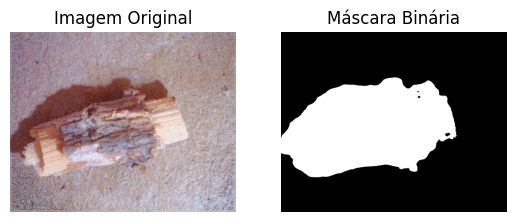

In [8]:
mascara_binaria = remove(imagem, only_mask=True)
mascara_binaria = np.where(mascara <10, 0, 1)



# Exibir a imagem original e a máscara binária
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mascara_binaria, cmap='gray')
plt.title('Máscara Binária')
plt.axis('off')

plt.show()